Формула линейной регрессии:

y = B0 + B1x1

После аппроксимации данных этой моделью её смысл заключается в представлении предсказаний y в качестве суммы взвешенных признаков х с коэф-ми В.
x - входные данные, y - выход (Результат аппроксимации\подгонки данных под модель, т.е. РЕЗУЛЬТАТ)

Возьмём данные:
y - вес
х - рост

Формула линейно-регрессивной модели:
вес = В0 + В1 * рост

In [2]:
import sys

try:
    import math
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    from sklearn import linear_model
    from sklearn.metrics import mean_absolute_error
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt
    from scipy.stats import pearsonr
except ImportError as e:
    print(e)
    sys.exit(-1)
except Exception as e:
    print(f"Unexpected error: {e}")
    sys.exit(-1)
finally:
    print("Imported all packages")

Imported all packages


✅ Начало анализа: загрузка данных...
✅ Успешно загружено 25000 записей
📊 После очистки: 25000 записей
📈 Коэффициент корреляции Пирсона: 0.5029
📉 Модель: Weight = 3.08 × Height + -82.58
📏 Средняя ошибка (MAE): 8.04 фунтов


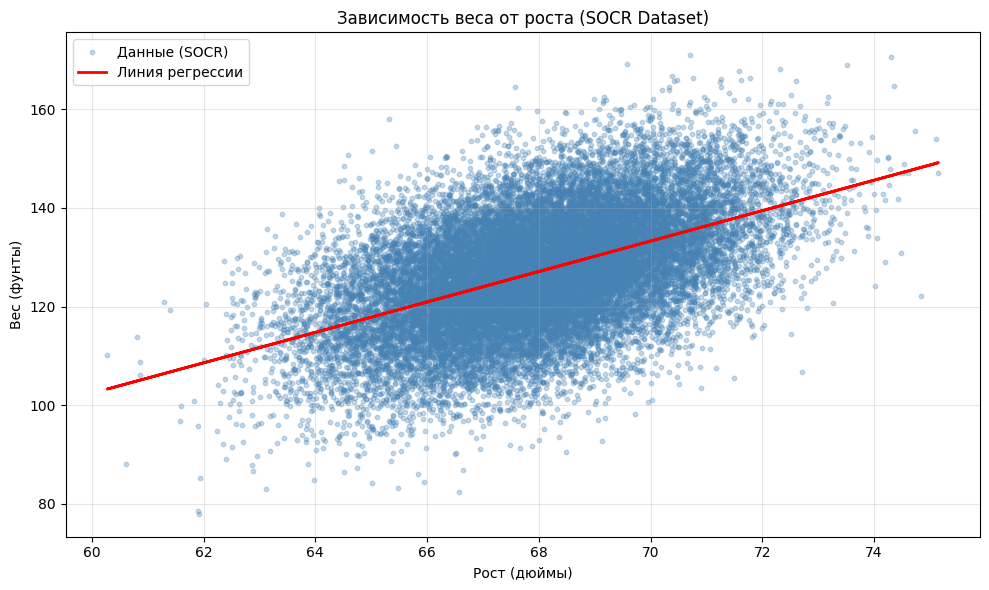

🎉 Анализ завершён!


In [3]:
print("✅ Начало анализа: загрузка данных...")

# --- 1. Загружаем данные ---
try:
    df = pd.read_csv('SOCR-HeightWeight.csv')
    print(f"✅ Успешно загружено {len(df)} записей")
except FileNotFoundError:
    print("❌ Ошибка: файл 'SOCR-HeightWeight.csv' не найден в текущей директории.")
    exit()
except Exception as e:
    print(f"❌ Ошибка при чтении файла: {e}")
    exit()

# --- 2. Проверяем колонки ---
expected_cols = ['Height(Inches)', 'Weight(Pounds)']
if not all(col in df.columns for col in expected_cols):
    print(f"❌ Ожидались колонки: {expected_cols}")
    print("📌 Доступные колонки:", list(df.columns))
    exit()

# Оставляем только нужные колонки и удаляем пустые строки
df_clean = df[expected_cols].dropna()

print(f"📊 После очистки: {len(df_clean)} записей")

# --- 3. Статистика ---
corr, _ = pearsonr(df_clean['Height(Inches)'], df_clean['Weight(Pounds)'])
print(f"📈 Коэффициент корреляции Пирсона: {corr:.4f}")

# --- 4. Линейная регрессия ---
X = df_clean[['Height(Inches)']]  # Признак (вход)
y = df_clean['Weight(Pounds)']     # Целевая переменная (выход)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)

print(f"📉 Модель: Weight = {model.coef_[0]:.2f} × Height + {model.intercept_:.2f}")
print(f"📏 Средняя ошибка (MAE): {mae:.2f} фунтов")

# --- 5. График ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, color='steelblue', s=10, label='Данные (SOCR)')
plt.plot(X, y_pred, color='red', linewidth=2, label='Линия регрессии')
plt.title('Зависимость веса от роста (SOCR Dataset)')
plt.xlabel('Рост (дюймы)')
plt.ylabel('Вес (фунты)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("🎉 Анализ завершён!")